Importing the Dependencies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler


In [ ]:
#loading the dataset to a pandas dataframe
credit_card_data = pd.read_csv('/content/creditcard.csv')


In [ ]:
#first five rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93176,64282,1.236457,0.214973,0.637424,0.703850,-0.693740,-1.194417,0.028446,-0.192515,0.113517,...,-0.242734,-0.733475,0.183933,0.689987,0.153440,0.076317,-0.032589,0.021078,1.98,0.0
93177,64282,1.156176,-0.319928,0.795544,0.469805,-0.838118,-0.032839,-0.695444,0.261600,0.876403,...,-0.013132,-0.152065,0.055522,-0.313683,0.037605,0.448817,-0.010598,0.018465,29.39,0.0
93178,64283,-0.374903,0.013912,0.888019,-1.723059,0.112982,-1.092045,0.697306,-0.351545,-1.067566,...,-0.436675,-0.678615,-0.027299,-0.136985,-0.404849,0.813763,0.106798,-0.027620,30.00,0.0
93179,64283,-0.508209,-0.102169,2.060352,-1.712190,-0.000407,0.804499,0.190440,0.002202,-0.540778,...,0.048476,0.510975,-0.512486,-0.854798,0.710197,-0.104946,-0.092805,-0.177516,29.90,0.0
93180,64283,-0.537899,0.550337,0.106653,-2.454657,2.316797,3.199409,0.048235,0.951972,-0.145197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93181 entries, 0 to 93180
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    93181 non-null  int64  
 1   V1      93181 non-null  float64
 2   V2      93181 non-null  float64
 3   V3      93181 non-null  float64
 4   V4      93181 non-null  float64
 5   V5      93181 non-null  float64
 6   V6      93181 non-null  float64
 7   V7      93181 non-null  float64
 8   V8      93181 non-null  float64
 9   V9      93181 non-null  float64
 10  V10     93181 non-null  float64
 11  V11     93181 non-null  float64
 12  V12     93181 non-null  float64
 13  V13     93180 non-null  float64
 14  V14     93180 non-null  float64
 15  V15     93180 non-null  float64
 16  V16     93180 non-null  float64
 17  V17     93180 non-null  float64
 18  V18     93180 non-null  float64
 19  V19     93180 non-null  float64
 20  V20     93180 non-null  float64
 21  V21     93180 non-null  float64
 22

0.0    92967
1.0      213
Name: Class, dtype: int64


<Axes: ylabel='count'>

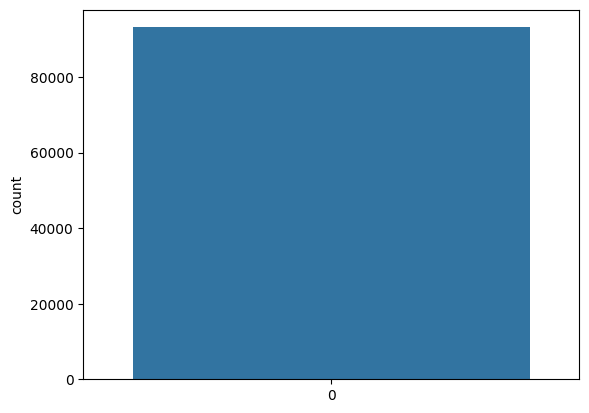

In [ ]:
print(credit_card_data['Class'].value_counts())
sns.countplot(credit_card_data['Class'])

In [ ]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
#Distribution of legit and fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    92967
1.0      213
Name: Class, dtype: int64

This dataset is highly unbalanced

0 --> Normal transaction
1 --> Fradulent transaction


In [ ]:
#seperating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(92967, 31)
(213, 31)


In [ ]:
#statistical measures of the data
legit.Amount.describe()


count    92967.000000
mean        99.009344
std        268.408062
min          0.000000
25%          7.610000
50%         26.970000
75%         89.950000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     213.000000
mean      108.459202
std       242.266755
min         0.000000
25%         1.000000
50%         7.610000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transctions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,40732.553444,-0.249294,-0.050715,0.696673,0.151978,-0.270404,0.098395,-0.094143,0.049142,-0.030153,...,0.042657,-0.031762,-0.107324,-0.037391,0.009802,0.131978,0.026776,0.000302,0.002228,99.009344
1.0,35331.652582,-6.244735,4.292771,-8.210525,5.013849,-4.514902,-1.875183,-6.513625,2.843951,-2.980089,...,0.370283,0.739456,-0.128955,-0.231495,-0.104869,0.212955,0.096711,0.531091,0.042891,108.459202


Under-Sampling

Build a sample dataset containing similar distribution of Normal and Fraudelent Transactions

No of Fraudulent Tranactions --> 213

In [ ]:
legit_sample = legit.sample(n=213)

Concatenating Two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
63963,50950,1.283714,-0.303378,-0.667669,-1.420164,0.410911,0.348311,-0.083358,0.119696,0.976475,...,-0.187015,-0.525151,-0.208424,-1.721052,0.657293,-0.592152,0.036566,-0.004523,33.44,0.0
59997,49104,1.019115,-0.332555,1.453262,1.196906,-1.215788,0.327464,-1.061388,0.514961,0.761477,...,0.326159,0.826480,-0.010893,0.160136,0.136173,-0.231982,0.067534,0.029854,27.45,0.0
56064,47255,0.969657,-0.432217,1.179540,1.235864,-0.961286,0.567357,-0.809973,0.477086,0.923462,...,0.023946,0.064037,-0.007363,-0.023474,0.226944,-0.395464,0.062763,0.029095,59.00,0.0
71200,54201,1.482387,-0.588294,-1.804074,-1.826507,1.883006,2.862792,-0.593291,0.586123,-1.286408,...,0.143951,0.173444,-0.209856,1.046919,0.948468,-0.070931,-0.028652,-0.002851,25.00,0.0
83614,59941,-2.710950,1.230531,1.149542,-1.219107,-2.079209,-0.207309,-1.269610,1.595249,-1.004907,...,-0.338719,-0.594226,-0.085863,0.305268,0.343681,0.356599,0.243865,0.101706,33.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88876,62330,1.140865,1.221317,-1.452955,2.067575,0.854742,-0.981223,0.325714,-0.037721,0.113219,...,-0.377597,-0.793460,-0.132333,-0.331586,0.664878,-0.309312,0.099942,0.122988,1.00,1.0
88897,62341,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1.0
89190,62467,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1.0
91671,63578,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1.0
92777,64093,-6.133987,2.941499,-5.593986,3.258845,-5.315512,-0.637328,-4.476488,1.695994,-1.606743,...,0.868340,0.793736,0.217347,-0.021985,0.145882,0.665088,-1.684186,0.310195,294.90,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    213
1.0    213
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,40926.577465,-0.056750,-0.029963,0.658816,-0.001303,-0.158780,0.077628,-0.126915,0.058612,0.068639,...,0.072201,-0.035557,-0.205242,-0.100767,-0.014215,0.200368,-0.014972,-0.003571,-0.024261,76.392535
1.0,35331.652582,-6.244735,4.292771,-8.210525,5.013849,-4.514902,-1.875183,-6.513625,2.843951,-2.980089,...,0.370283,0.739456,-0.128955,-0.231495,-0.104869,0.212955,0.096711,0.531091,0.042891,108.459202


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
63963  50950  1.283714 -0.303378 -0.667669 -1.420164  0.410911  0.348311   
59997  49104  1.019115 -0.332555  1.453262  1.196906 -1.215788  0.327464   
56064  47255  0.969657 -0.432217  1.179540  1.235864 -0.961286  0.567357   
71200  54201  1.482387 -0.588294 -1.804074 -1.826507  1.883006  2.862792   
83614  59941 -2.710950  1.230531  1.149542 -1.219107 -2.079209 -0.207309   
...      ...       ...       ...       ...       ...       ...       ...   
88876  62330  1.140865  1.221317 -1.452955  2.067575  0.854742 -0.981223   
88897  62341 -5.267760  2.506719 -5.290925  4.886134 -3.343188 -1.100085   
89190  62467 -5.344665 -0.285760 -3.835616  5.337048 -7.609909  3.874668   
91671  63578 -0.639191 -0.085595  1.265452  1.401166 -0.260542  1.009795   
92777  64093 -6.133987  2.941499 -5.593986  3.258845 -5.315512 -0.637328   

             V7        V8        V9  ...       V20       V21       V22  \
63963 -0.0833

In [ ]:
print(Y)

63963    0.0
59997    0.0
56064    0.0
71200    0.0
83614    0.0
        ... 
88876    1.0
88897    1.0
89190    1.0
91671    1.0
92777    1.0
Name: Class, Length: 426, dtype: float64


Split The Data Into Training & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(426, 30) (340, 30) (86, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression Model With Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training Data: ', training_data_accuracy)

Accuracy on Training Data:  0.9558823529411765


In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9651162790697675


In [ ]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(model, params, cv=5)

In [ ]:
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
confusion = confusion_matrix(Y_test, y_pred)
print("Confusion matrix:\n", confusion)
report = classification_report(Y_test, y_pred)
print("Classification report:\n", report)
accuracy = grid_search.score(X_test, Y_test)
print(f"Accuracy: {accuracy:.2%}")

Confusion matrix:
 [[43  0]
 [ 2 41]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        43
         1.0       1.00      0.95      0.98        43

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86

Accuracy: 97.67%


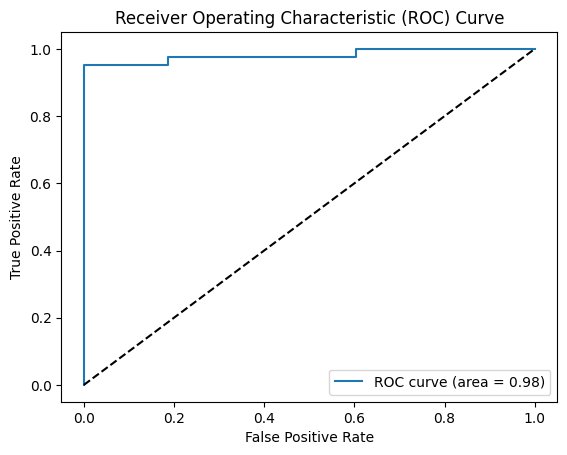

In [ ]:
y_prob = grid_search.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
auc = roc_auc_score(Y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC curve (area = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix')

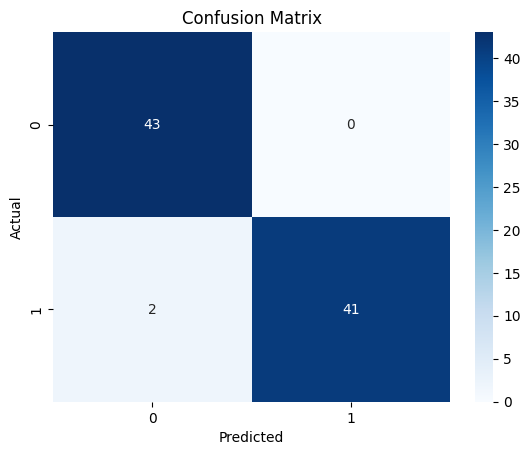

In [ ]:
sns.heatmap(confusion, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')